# Exercícios - Visualização de Dados 🔍 🎲

Vamos praticar o que aprendemos sobre visualização de dados com o *dataset* de despesas dos deputados que criamos na aula passada. Este conjunto de dados está disponível no arquivo `deputados_despesas.csv` através do seguinte caminho:
```
arq_deputados_despesas = './data/deputados_despesas.csv'
```
Para começar, importe as bibliotecas necessárias e carregue o *dataset* em um *DataFrame* do Pandas. Investigue-o, verificando as colunas, os tipos de dados, a quantidade de linhas, etc. O arquivo carregado já possui os dados limpos, então não é necessário realizar nenhum tratamento.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline


In [2]:
arq_deputados_despesas = './data/deputados_despesas.csv'
df_dep_desp = pd.read_csv(arq_deputados_despesas, sep=';', encoding='utf-8')


In [3]:
df_dep_desp.head()


,mes,ano,nome,idLegislaturaInicial,idLegislaturaFinal,ufNascimento,municipioNascimento,txNomeParlamentar,sgPartido,txtDescricao,txtFornecedor,vlrDocumento,vlrGlosa,vlrLiquido,datEmissao
0,5,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,EDVALDO FRANCISCO DE OLIVEIRA,398.28,0.0,398.28,2021-05-04 00:00:00
1,12,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-12-02 00:00:00
2,10,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-10-04 00:00:00
3,11,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-11-01 00:00:00
4,12,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-12-30 00:00:00


In [5]:
df_dep_desp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138696 entries, 0 to 138695
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mes                   138696 non-null  int64  
 1   ano                   138696 non-null  int64  
 2   nome                  138696 non-null  object 
 3   idLegislaturaInicial  138696 non-null  int64  
 4   idLegislaturaFinal    138696 non-null  int64  
 5   ufNascimento          138696 non-null  object 
 6   municipioNascimento   138696 non-null  object 
 7   txNomeParlamentar     138696 non-null  object 
 8   sgPartido             138696 non-null  object 
 9   txtDescricao          138696 non-null  object 
 10  txtFornecedor         138696 non-null  object 
 11  vlrDocumento          138696 non-null  float64
 12  vlrGlosa              138696 non-null  float64
 13  vlrLiquido            138696 non-null  float64
 14  datEmissao            138696 non-null  object 
dtype

Vamos trabalhar inicialmente somente com os dados de 2023. Para isso, crie um novo *DataFrame* que contenha somente as linhas em que o ano seja igual a 2023. 

In [4]:
#Filtrando os dados para o ano de 2023
df_dep_desp_2023 = df_dep_desp[df_dep_desp['ano'] == 2023]
df_dep_desp_2023.head()


,mes,ano,nome,idLegislaturaInicial,idLegislaturaFinal,ufNascimento,municipioNascimento,txNomeParlamentar,sgPartido,txtDescricao,txtFornecedor,vlrDocumento,vlrGlosa,vlrLiquido,datEmissao
434,1,2023,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,TELEFONIA,CELULAR FUNCIONAL,30.48,0.0,30.48,2023-01-16 00:00:00
586,3,2023,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,I. RODRIGUES DE ALMEIDA,25000.00,0.0,25000.00,2023-03-14 00:00:00
587,1,2023,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,TELEFONIA,CELULAR FUNCIONAL,353.70,0.0,353.70,2023-01-16 00:00:00
588,2,2023,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,TELEFONIA,CELULAR FUNCIONAL,353.70,0.0,353.70,2023-02-15 00:00:00
589,2,2023,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,TELEFONIA,CELULAR FUNCIONAL,116.43,0.0,116.43,2023-02-14 00:00:00


## Deputados e partidos mais gastadores em 2023 🤑

Plote gráficos que respondam às seguintes perguntas, utilizando o *DataFrame* criado:
1. Quais os 10 deputados que mais gastaram com cotas parlamentares em 2023? Use um gráfico de barras para mostrar o resultado.
2. Quais os 10 partidos que mais gastaram com cotas parlamentares em 2023? Use um gráfico de barras para mostrar o resultado.

Plote os gráficos acima em um grid 1x2, lado a lado.

In [8]:
#Vamos descobrir quais os 10 deputados que mais gastaram com cotas parlamentares em 2023.
lista_dep = df_dep_desp_2023['nome'].unique()


In [9]:
dict_dep_desp_soma = {}
for dep in lista_dep:
    dict_dep_desp_soma[dep] = df_dep_desp_2023[df_dep_desp_2023['nome'] == dep]['vlrLiquido'].sum()
df_dep_desp_soma = pd.DataFrame(list(dict_dep_desp_soma.items()), columns=['Deputado', 'Despesa Total em 2023'])
df_dep_desp_soma


,Deputado,Despesa Total em 2023
0,Acácio Favacho,391819.54
1,Adolfo Viana,296977.65
2,Adriana Ventura,56897.38
3,Adriano do Baldy,229004.83
4,Airton Faleiro,390696.81
...,...,...
132,Talíria Petrone,226732.08
133,Túlio Gadêlha,242015.60
134,Vermelho,300333.25
135,Zé Neto,387802.45


In [12]:
#Visualizando os 10 deputados que mais gastaram com cota parlamentares em 2023.
lista_top10_dep = df_dep_desp_soma.sort_values(by='Despesa Total em 2023', ascending=False).head(10)['Deputado'].tolist()
lista_top10_dep


['Silvia Cristina',
 'Nicoletti',
 'General Girão',
 'Bibo Nunes',
 'Joseildo Ramos',
 'Acácio Favacho',
 'Alencar Santana',
 'Airton Faleiro',
 'Beto Pereira',
 'Zé Neto']

In [10]:
#Descobrindo agora os 10 partidos que mais gastaram em 2023.
lista_part = df_dep_desp_2023['sgPartido'].unique()
dict_part_desp_soma = {}
for partido in lista_part:
    dict_part_desp_soma[partido] = df_dep_desp_2023[df_dep_desp_2023['sgPartido'] == partido]['vlrLiquido'].sum()
df_part_desp_soma = pd.DataFrame(list(dict_part_desp_soma.items()), columns=['Partido', 'Despesa Total em 2023'])


In [10]:
df_part_desp_soma.sort_values(by='Despesa Total em 2023', ascending=False).head(10)


,Partido,Despesa Total em 2023
6,PL,9801439.17
9,PSD,4023940.83
8,UNIÃO,3758587.93
4,PT,3392845.20
5,REPUBLICANOS,2992393.58
3,PP,2911763.48
0,MDB,2442183.37
1,PSDB,1300047.91
10,PATRIOTA,985427.03
11,PDT,978452.09


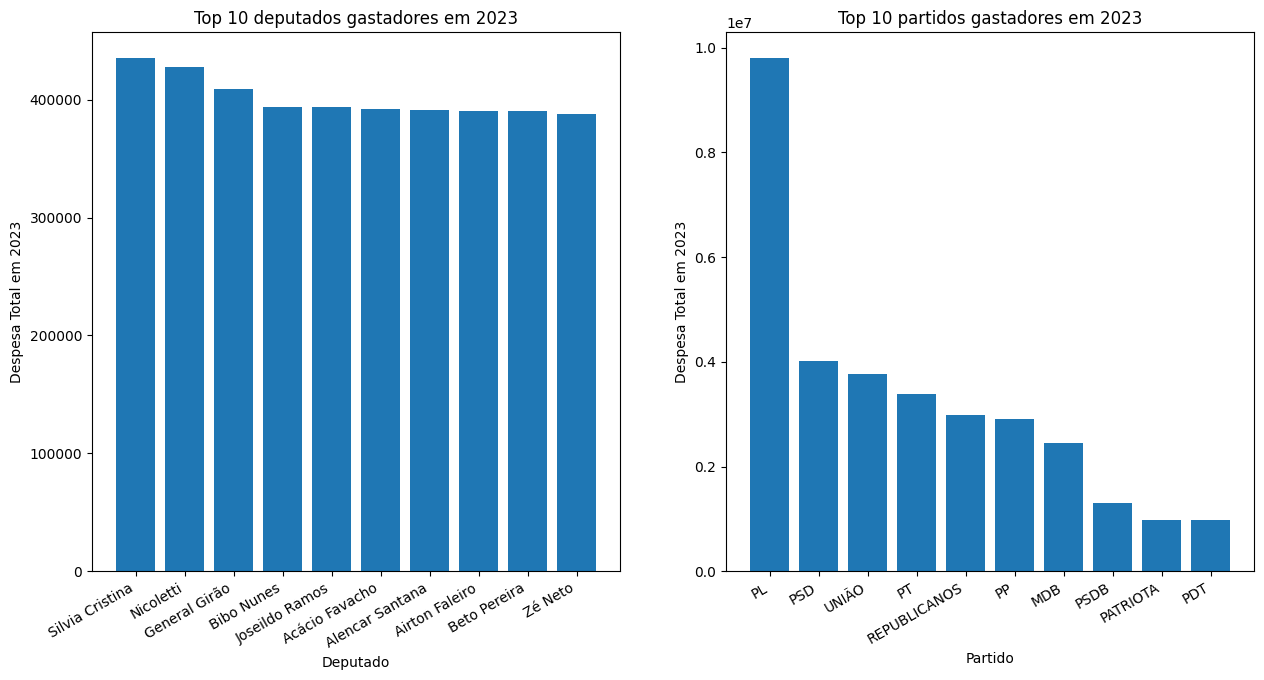

In [11]:
#Adicionando os graficos acima lado a lado
fig = plt.figure(figsize=(15,7)) #criar uma figura

ax1 = fig.add_subplot(1, 2, 1) #em um grid 1x2, criar um espaço na primeira posição
ax2 = fig.add_subplot(1, 2, 2) #em um grid 1x2, criar um espaço na segunda posição

#rotaciona os labels do eixo x em 30 graus em ambas as figuras
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')

ax1.bar(x='Deputado', height='Despesa Total em 2023', data=df_dep_desp_soma.sort_values(by='Despesa Total em 2023', ascending=False).head(10))
ax2.bar(x='Partido', height='Despesa Total em 2023', data=df_part_desp_soma.sort_values(by='Despesa Total em 2023', ascending=False).head(10))

#título e rótulos
ax1.set(title=f'Top 10 deputados gastadores em 2023', xlabel='Deputado', ylabel='Despesa Total em 2023');
ax2.set(title=f'Top 10 partidos gastadores em 2023', xlabel='Partido', ylabel='Despesa Total em 2023');


## Com o quê mais gastaram os deputados mais gastadores? 🤔
Agora vamos investigar quanto gastaram os deputados mais gastadores com as top 5 despesas mais comuns em 2023. Para isso, descubra quais são as 5 despesas mais realizadas pelos deputados e crie um novo *DataFrame* contendo os valores gastos por cada um dos 10 deputados mais gastadores em cada uma dessas despesas. Utilize um grafico de barras empilhadas para mostrar o resultado. 

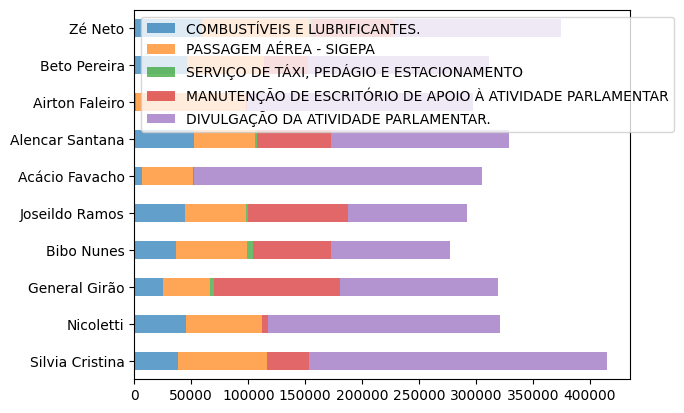

In [12]:
import numpy as np
#Com o que os top 10 deputados gastam mais?
#top 5 despesas mais comuns
lista_top5_tipo_desp = df_dep_desp_2023['txtDescricao'].value_counts().head(5).index.tolist()
dict_dep_desp_soma_tipo = {}
for dep in lista_top10_dep:
    dict_desp_soma_tipo = {}
    df_desp_por_dep = df_dep_desp_2023[df_dep_desp_2023['nome'] == dep]
    for tipo_desp in lista_top5_tipo_desp:
        dict_desp_soma_tipo[tipo_desp] = df_desp_por_dep[df_desp_por_dep['txtDescricao'] == tipo_desp]['vlrLiquido'].sum()
    dict_dep_desp_soma_tipo[dep] = dict_desp_soma_tipo

#Criando um dataframe com os dados de dict_dep_desp_soma_tipo
df_dep_desp_soma_tipo = pd.DataFrame(dict_dep_desp_soma_tipo)
df_dep_desp_soma_tipo

#criando um stacked barplot com os dados de df_dep_desp_soma_tipo
df_dep_desp_soma_tipo.T.plot.barh(stacked=True, alpha=0.7);


## 🌶️🌶️ Desafio: Evolução dos gastos do(a) deputado(a) mais gastador(a) 📈
Quem foi o deputado(a) mais gastador(a) de 2023? Plote um gráfico de linha que mostre a evolução dos gastos dele(a) ao longo dos meses dos anos de 2021, 2022 e 2023.

/var/folders/b0/tln1wqx57259sgssw5c6psy40000gn/T/ipykernel_69560/478407094.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_mais_gastou['ano_mes'] = df_dep_mais_gastou.apply(lambda row: str(row['mes']) + '-' + str(row['ano']), axis=1)
/var/folders/b0/tln1wqx57259sgssw5c6psy40000gn/T/ipykernel_69560/478407094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_mais_gastou.sort_values(by=['ano', 'mes'], inplace=True)


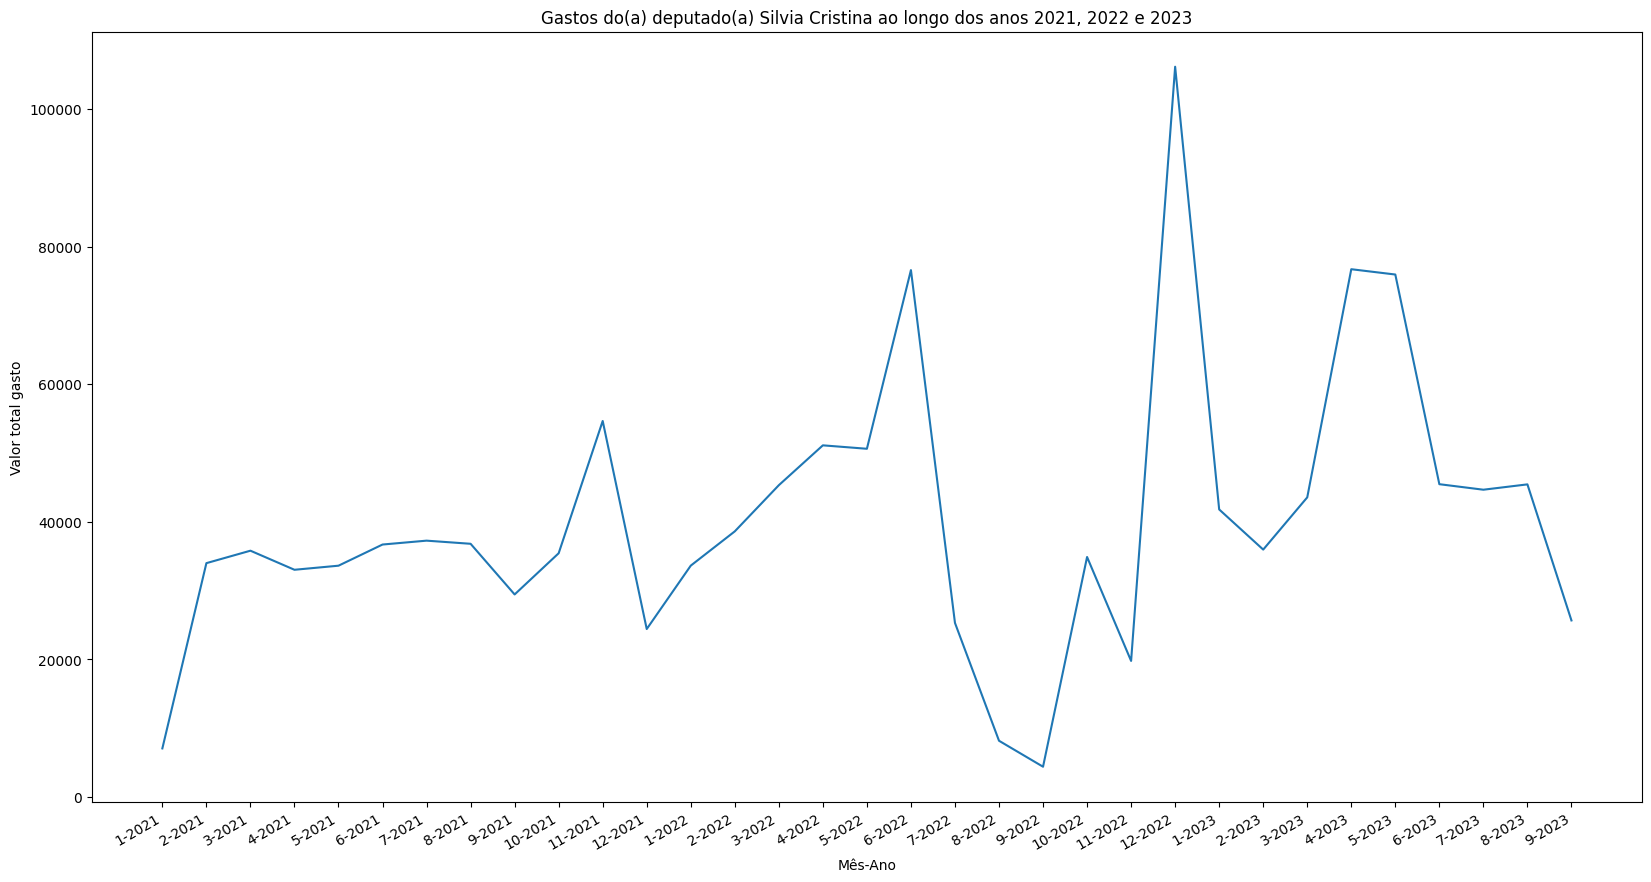

In [13]:
#Finalmente, vamos ver a evolução dos gastos da parlamentar que mais gastou ao longo dos anos.
#Seleciona o deputado que mais gastou
nome = df_dep_desp_soma.sort_values(by='Despesa Total em 2023', ascending=False).head(1)['Deputado'].iloc[0]
df_dep_mais_gastou = df_dep_desp[df_dep_desp['nome'] == nome]

#criar um df com o valor total gasto por mes e ano
df_dep_mais_gastou['ano_mes'] = df_dep_mais_gastou.apply(lambda row: str(row['mes']) + '-' + str(row['ano']), axis=1)
df_dep_mais_gastou.sort_values(by=['ano', 'mes'], inplace=True)
lista_ano_mes = df_dep_mais_gastou['ano_mes'].unique()
dict_dep_mais_gastou_ano_mes = {}
for ano_mes in lista_ano_mes:
    dict_dep_mais_gastou_ano_mes[ano_mes] = df_dep_mais_gastou[df_dep_mais_gastou['ano_mes'] == ano_mes]['vlrLiquido'].sum()
df_dict_dep_mais_gastou_ano_mes = pd.DataFrame(list(dict_dep_mais_gastou_ano_mes.items()), columns=['ano_mes', 'vlrLiquido'])

#criar um gráfico de linha com os dados de df_dict_dep_mais_gastou_ano_mes
plt.figure(figsize=(20,10))
#rotaciona os labels do eixo x em 30 graus no plt
plt.xticks(rotation=30, horizontalalignment='right')
#set the title and the labels
plt.title(f'Gastos do(a) deputado(a) {nome} ao longo dos anos 2021, 2022 e 2023')
plt.xlabel('Mês-Ano')
plt.ylabel('Valor total gasto')
plt.plot(df_dict_dep_mais_gastou_ano_mes['ano_mes'], df_dict_dep_mais_gastou_ano_mes['vlrLiquido'])
plt.show()
